<h1 align="center">Machine Learning automatique avec H2O AutoML</h1>

*Par [Josué AFOUDA](https://afouda-datascience.com/)*

Pour plus de contenus en Data Science/Machine Learning/deep Learning, veuillez vous abonner à [ma chaîne YouTube](https://www.youtube.com/channel/UCpd56FfjlkKbkHlbgY6XE3w)

Dans ce tutoriel, vous apprendrez ce qu'est **H2O** particulièrement **H2O AutoML** ainsi que son implémentation dans Python à travers un jeu de données réel. En effet, nous construirons de manière automatisée un modèle de machine learning en utilisant les fonctionnalités de H2O AutoML.

## <font color=green> Tâche 1 : Qu'est-ce que H20 AutoML et pourquoi cet outil ?

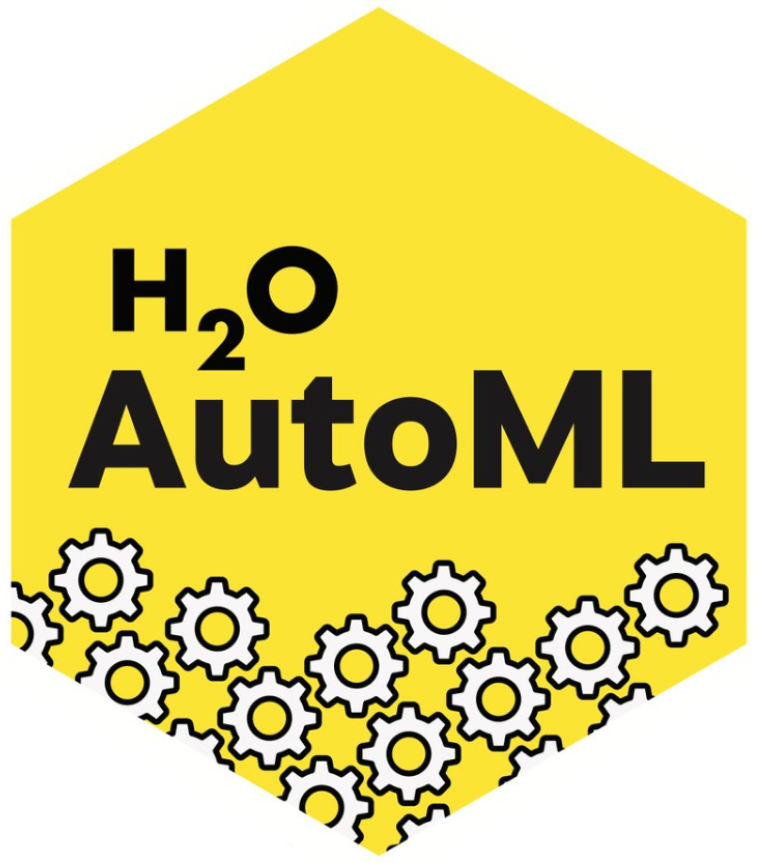

Avant de vous définir **H20** et surtout **H20 AutoML**, je dois d'abord vous parler de la société **H20.AI**.

**H20.AI** est une entreprise de la Silicon Valley spécialisée dans le développement de logiciels open source en Intelligence Artificielle. Son principal produit est la plateforme **H2O** qui est la principale plateforme open source de Data Science et de Machine Learning utilisée par des centaines de milliers de Data Scientists et d'organisations à travers le monde y compris les 500 plus grandes entreprises du monde.

**H20** est donc un logiciel dont le code de base est écrit en Java mais qui dispose aussi des interfaces d'utilisateurs (*API* ou *Application Programming Interface*) en R et Python ce qui a propulsé son utilisation massive dans la communauté mondiale de la Data Science. R et Python étant deux langages très populaires en Data Science. En gros **H2O**, de par sa rapidité et ses fonctionnalités évolutives, permet de créer des modèles d'apprentissage automatique en toute simplicité. 

**Pourquoi H2O et qu'est-ce que H2O AutoML ?** Ces dernières années, la demande d'experts en Machine Learning a dépassé l'offre, malgré l'afflux de personnes entrant dans le domaine. De plus, il y a beaucoup de buzz pour les algorithmes de Machine Learning ainsi qu'une forte exigence pour ses experts non seulement en terme de compréhension mathématique mais aussi en terme de codage informatique. Pour combler cette lacune, de grands progrès ont été réalisés dans le développement de logiciels d'apprentissage automatique conviviaux pouvant être utilisés par des non-experts. L'Intelligence Artificielle n'a en réalité plus rien d'artificiel. Elle est déjà là, présente et concrète dans de nombreux domaines et elle présente de nombreux avantages Ceci étant, elle doit donc être accessible à tout le monde. La mission de **H20** est donc de démocratiser l'Intelligence Artificielle pour tous. **H2O** est subdivisée en deux produits pricipaux qui ont tous les deux le même objectif d'automatiser le flux de travail en Machine Learning, qui comprend la formation et le réglage automatiques de nombreux modèles dans un délai spécifié par l'utilisateur lui-même. 

- ***H2O AutoML*** : cet outil, que nous verrons dans ce tutoriel, peut être utilisé par des utilisateurs avancés (pas forcément des experts). **H2O AutoML** fournit une fonction permet d'exécuter en seulement quelques lignes de code un grand nombre de tâches liées à la modélisation qui nécessiteraient généralement de nombreuses lignes de code. Cela permet de libérer du temps à l'utilisateur pour se concentrer sur d'autres aspects des étapes de la Data Science telles que le prétraitement des données, l'ingénierie des fonctionnalités (*Feature Engineering*) et le déploiement de modèles.

- ***H2O Flow*** : H20 Flow est en quelque sorte l'interface web graphique de H2O AutoML qui permet de créer et d'évaluer la performance des modèles de Machine ou de Deep Learning à partir de simples clics et sans écrire une seule ligne de code. Génial n'est-ce pas :)

Mais ATTENTION ! Bien que H2O permet aux non-experts d'expérimenter facilement l'apprentissage automatique, il reste encore beaucoup de connaissances et d'expérience en Data Science qui sont nécessaires pour produire des modèles de Machine Learning hautement performants. Les réseaux de neurones profonds en particulier, ce qu'on appelle Deep Learning restent quand même difficiles à régler correctement pour un non-expert. 


Voci une petite vidéo de [SRI AMBATI](https://youtu.be/izd3jIzUvTA), CEO de **H2O.AI** qui parle de cette société innovante.

### <font color=red>POUR VITE MAITRISER LE MACHINE LEARNING AVEC PYTHON :

Si vous êtes un débutant en Data Science et que vous aimerez comprendre rapidement les bases fondamentales du Machine Learning sans rentrer dans les théories complexes qui vont vous fatiguer, je vous conseille le livre intitulé [Machine Learning par la pratique avec Python: Projets réels dans les Finances, l'Immobilier, le Trading, la Santé, le Marketing, etc.](https://www.amazon.fr/gp/product/B08DV8X9D2/ref=dbs_a_def_rwt_hsch_vamf_tkin_p1_i3). Ce livre est purement pratique car il vous permet d'apprendre à créer et à évaluer des modèles de Machine Learning en traitement des problématiques rencontrées en entreprises. Grâce à ce livre, vous puvez vous constituer votre propre portfolio de projets et vous faire remarquer par les recruteurs.

A travers ce livre, vous apprendrez à :

- Nettoyer un jeu de données et la rendre prête pour la modélisation (Traitement des valeurs manquantes, Détection et suppression des outliers, Encodage des variables catégorielles, Normalisation des données, etc.) ;

- Construire un modèle de classification (LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, etc.) et d'un modèle de régression (LinearRegression, RandomForestRegressor, DecisionTreeRegressor, KNeighborsRegressor, etc.) ;

- Evaluer la performance d’un modèle (Données d’entraînement et d’évaluation, Choix de la métrique, Validation croisée, Robustesse du modèle, etc.) ;

- effectuer des prédictions ;

- modéliser des séries temporelles et effectuer des prévisions ;

- rechercher les hyperparamètres optimaux d'un modèle en utilisant les méthodes Grid Search et Random Search ;

- automatiser la sélection du meilleur modèle avec l'outil TPOT ;ⱷautomatiser le flux de travail de vos projets de Machine Learning ;

- effectuer des segmentations avec des algorithmes comme KMeans ;

- réduire la dimension de grand ensembles de données en utilisant l'ACP, ...etc.

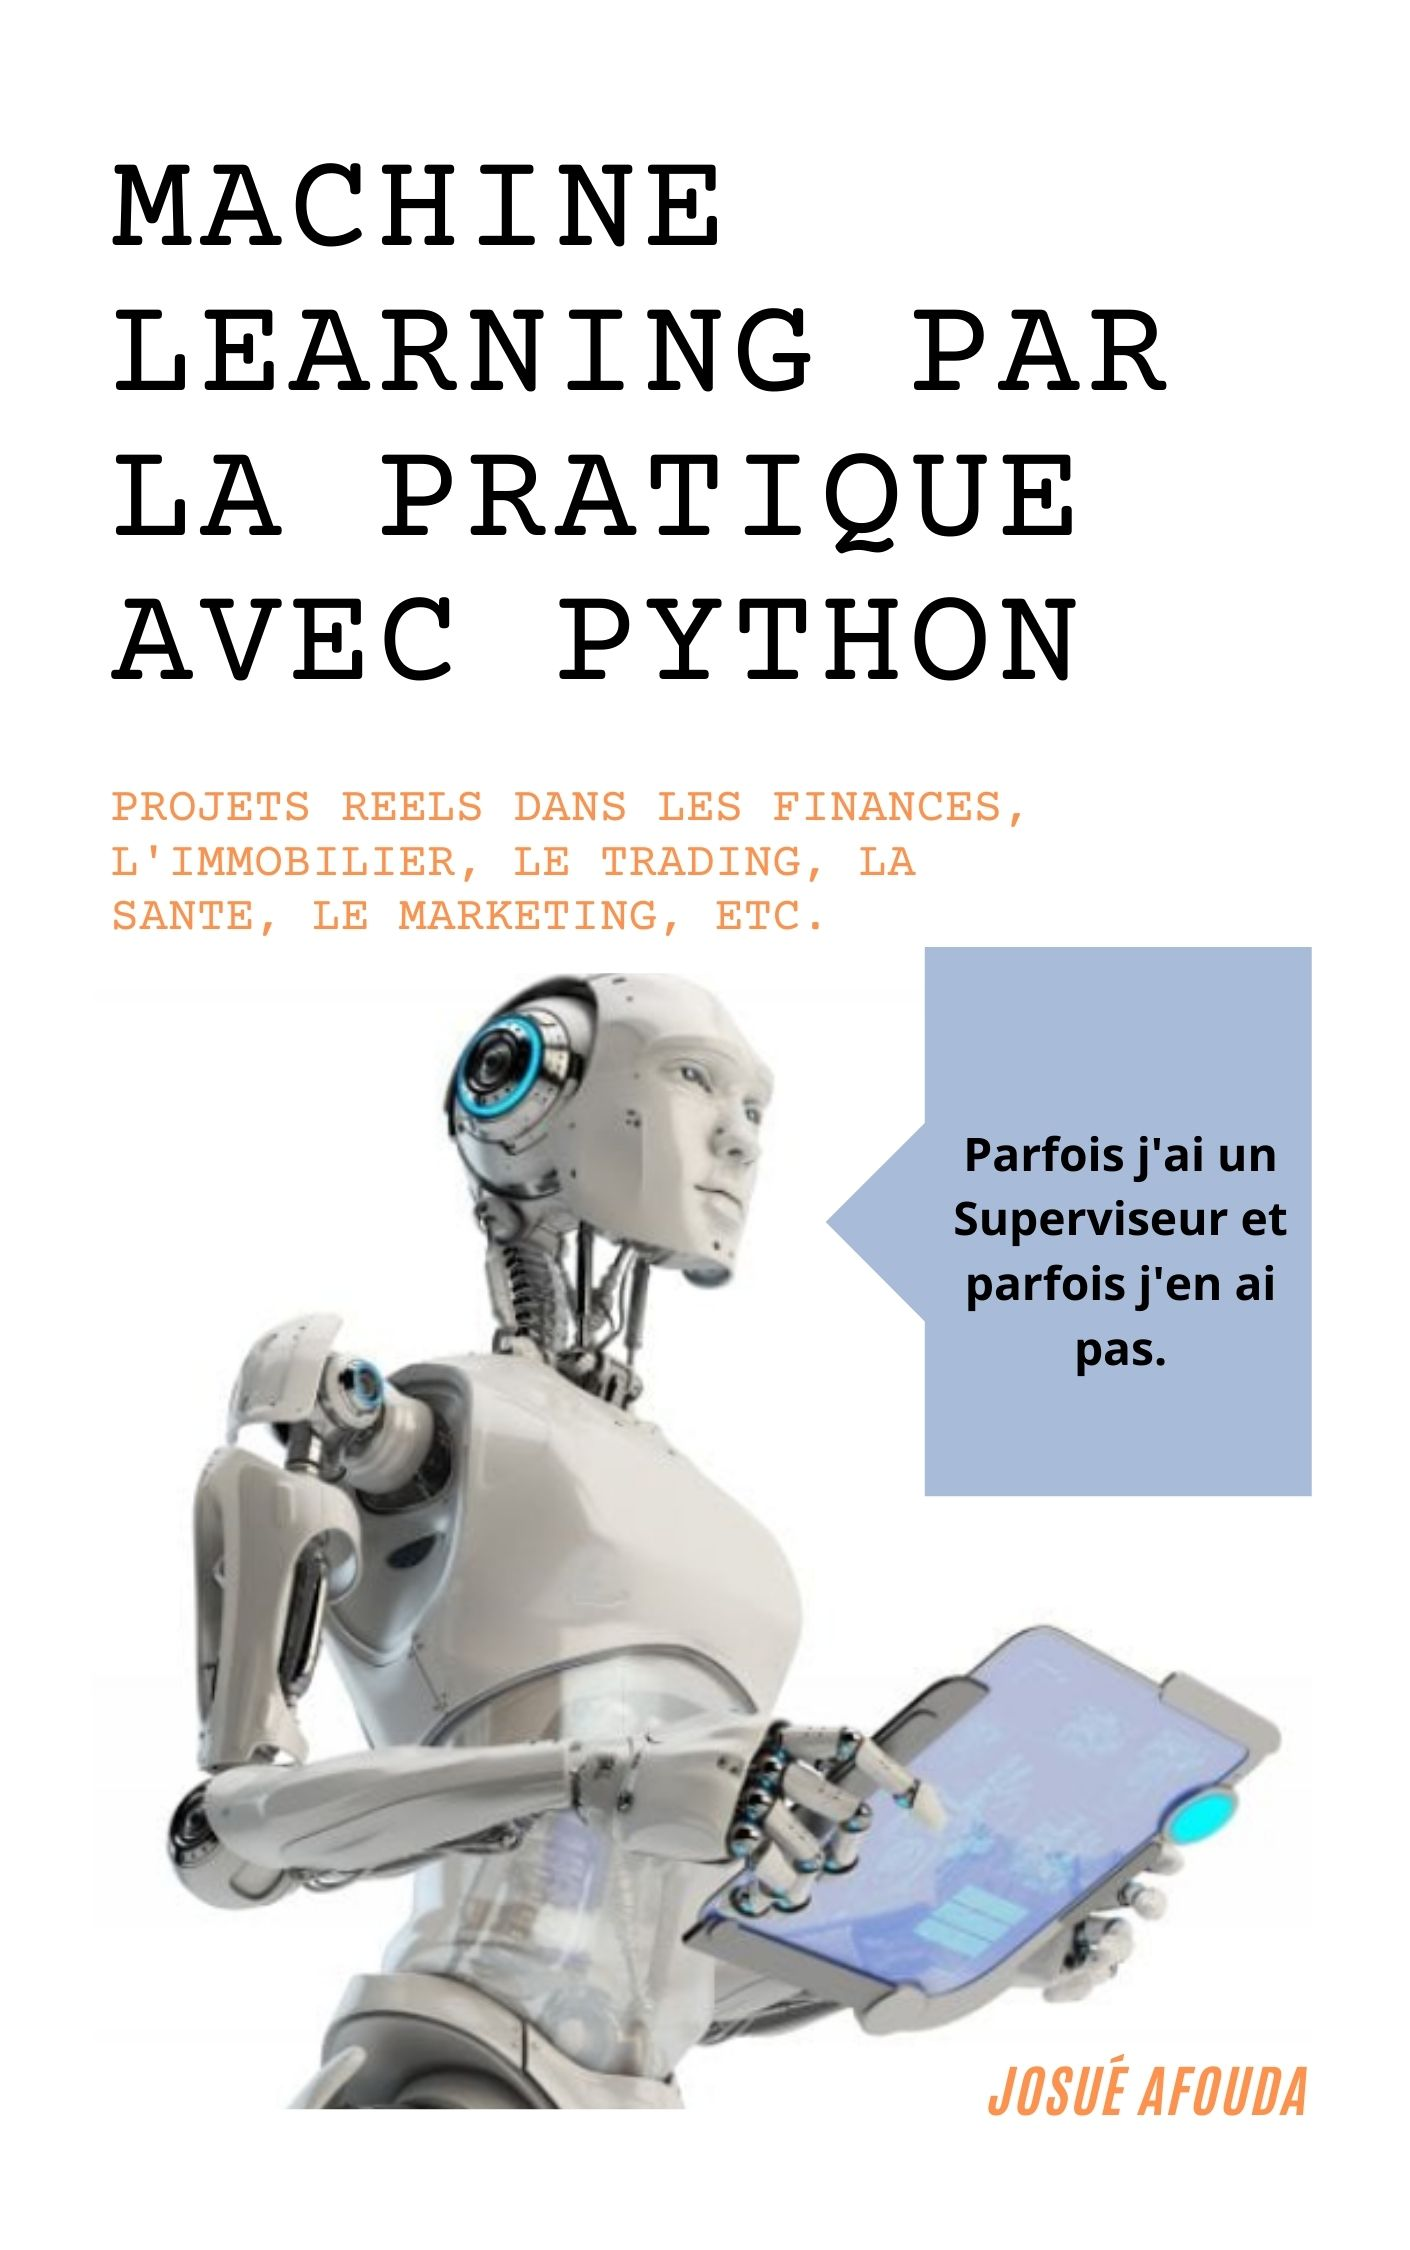

## <font color=green> Tâche 2 : Importation des librairies/fonctions nécessaires

Pour installer h2o et pouvoir l'utiliser avec Python, vous pouvez exécuter le code suivant :

***pip install -U h2o***

Pour d'éventuels problèmes d'installation, veuillez consulter la page : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html

In [1]:
# Librairies nécessaires

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import h2o

from h2o.automl import H2OAutoML

## <font color=green> Tâche 3 : Importation et Exploration des données

Les données utilisées dans ce cadre de ce projet proviennent de [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) qui est un célèbre répertoire de données pour s'entraîner dans les différentes tâches en Machine Learning (Classification, Régression, etc.). Il s'agit précisément des données liées à des campagnes de marketing direct d'une institution bancaire portugaise. Ici, il s'agit d'une tâche de classification binaire qui consiste à prédire si un client de la banque va oui ('yes') ou non ('no') souscrire à un dépôt bancaire à terme. Un dépôt à terme (DAT) est une somme bloquée sur un compte bancaire par un particulier ou une entreprise en contrepartie du versement d'intérêts. Une fois que le client a souscrit à un tel compte, son argent pourra être retiré qu'à l'échéance d'une certaine période définie préalablement lors de l'ouverture du compte bloqué. Ce type de dépôt est très profitable aux banques car il leur permet de disposer de beaucoup de liquidités et donc de pouvoir faire de bonnes affaires avec l'argent des épargnants.

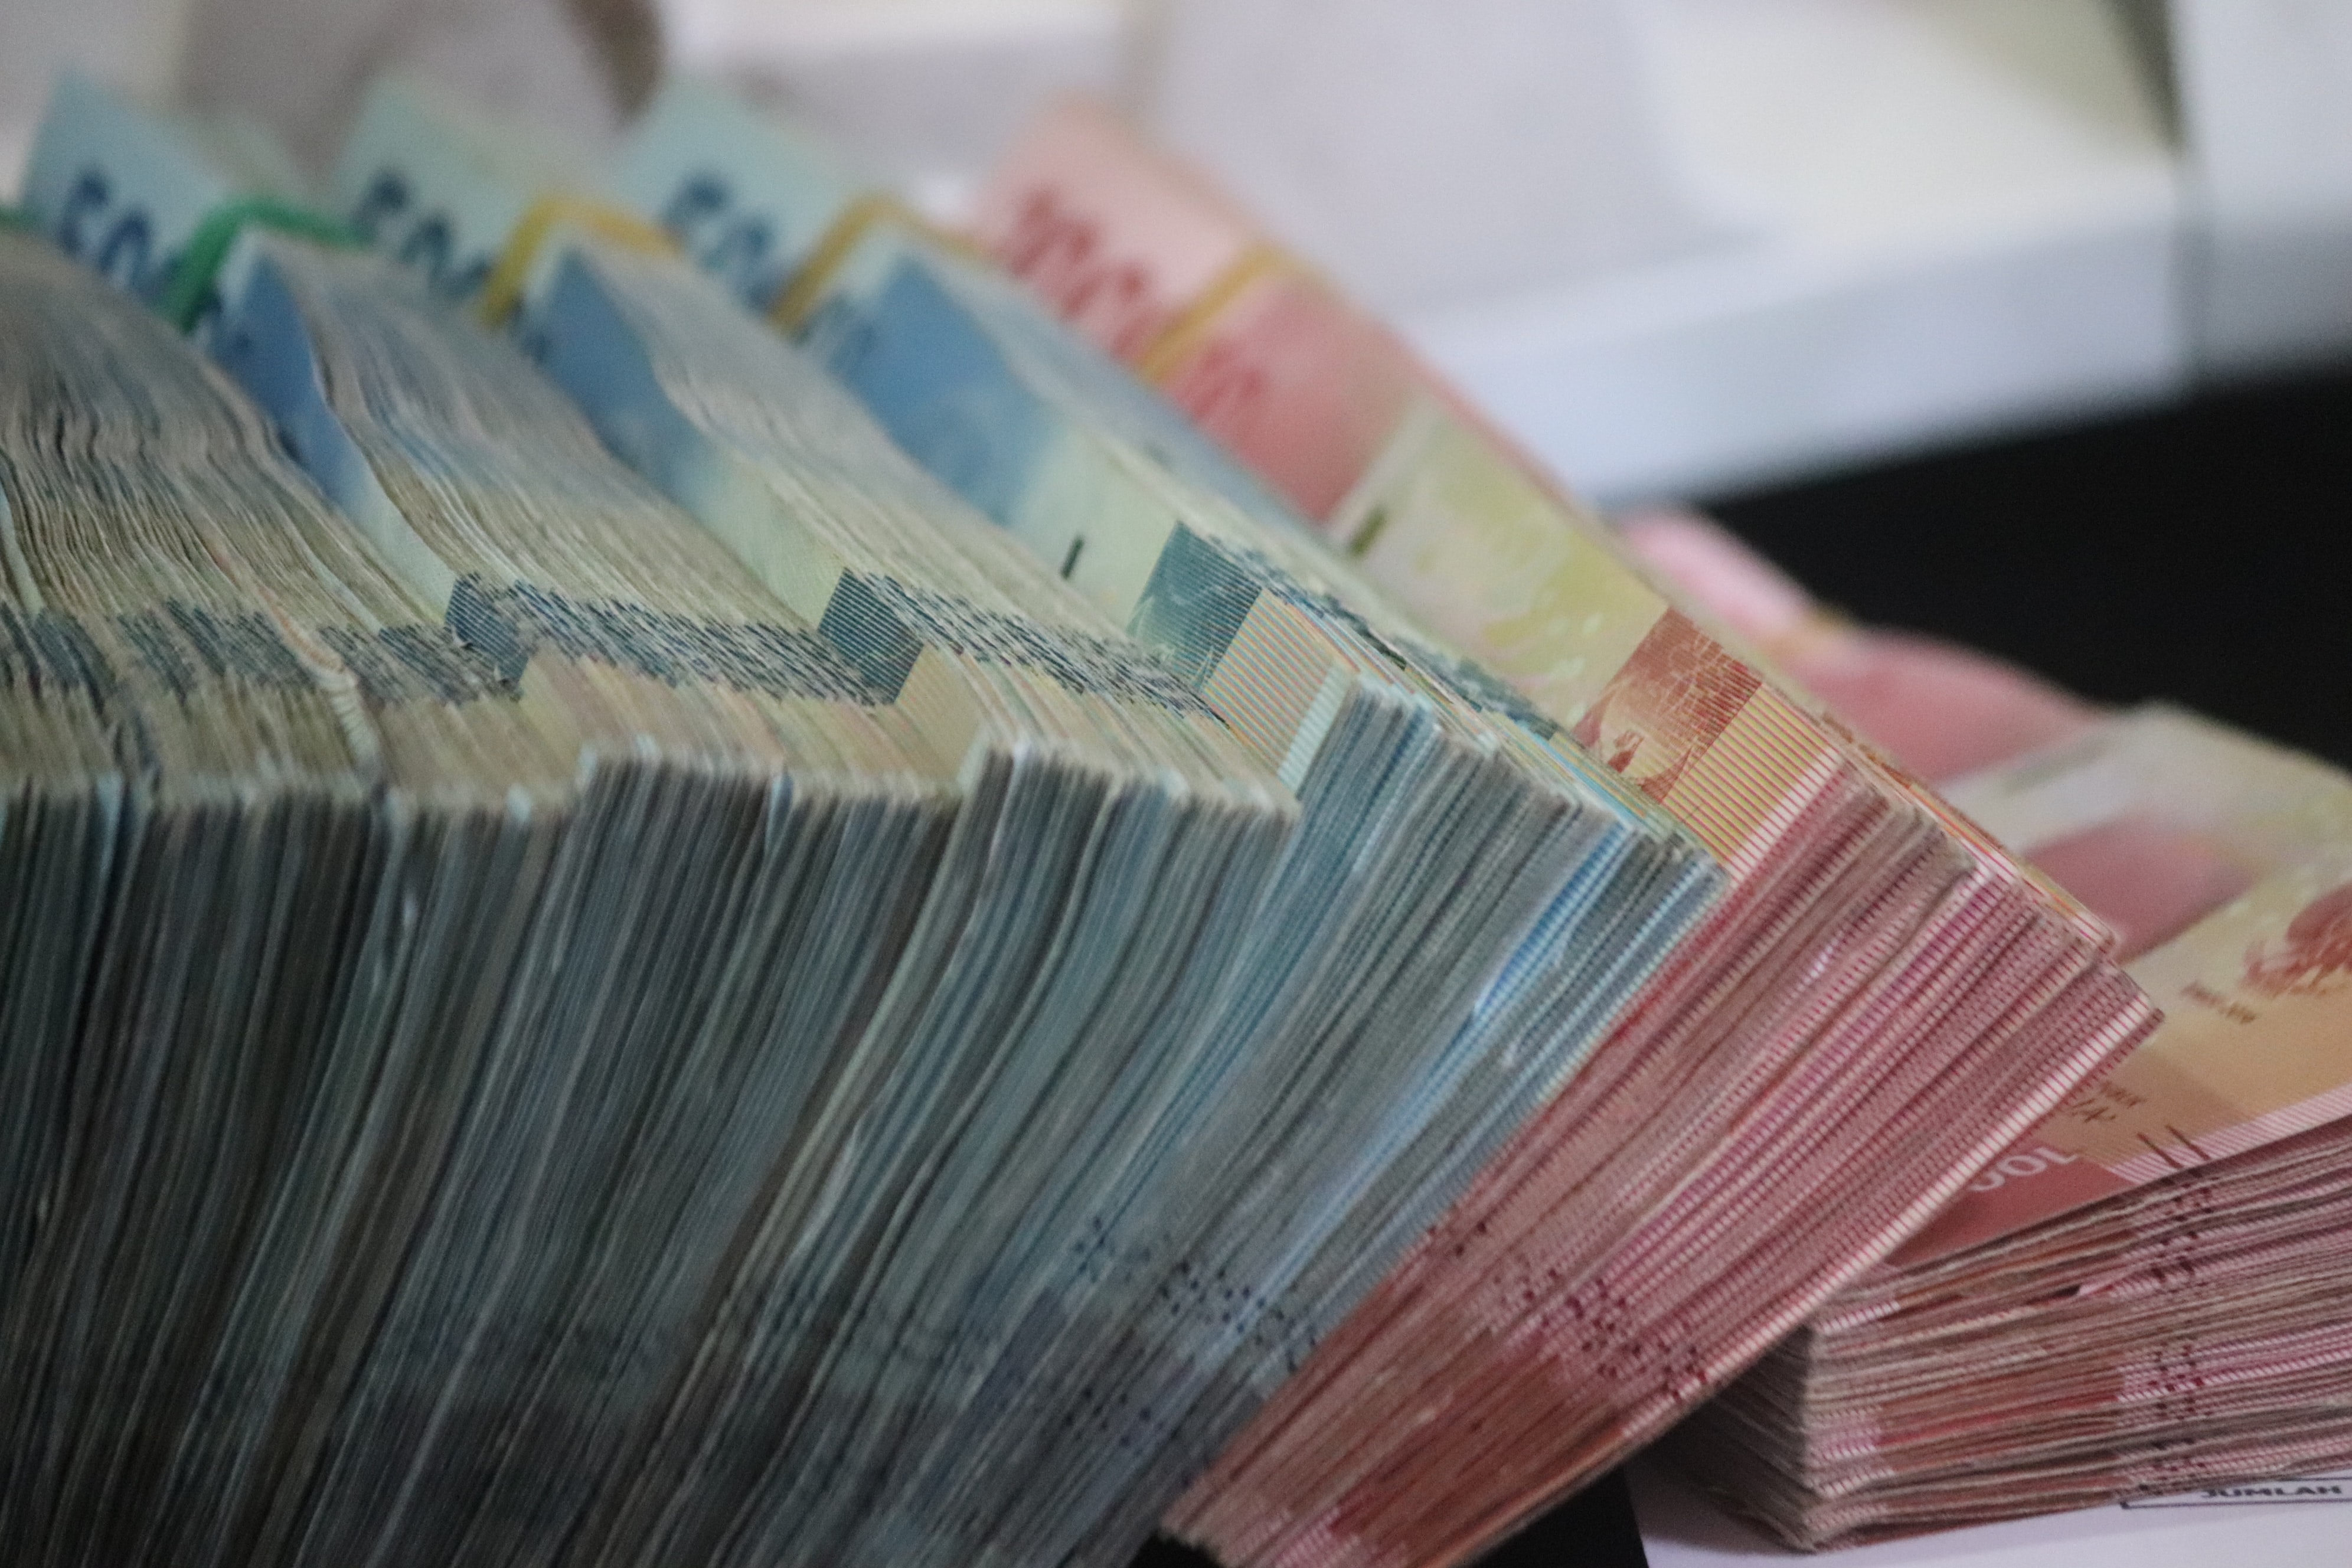

Les données sont également disponibles directement sur ma page [GitHub](https://github.com/JosueAfouda/Machine-Learning-par-la-pratique-avec-Python/raw/master/bank-additional-full.csv).

In [2]:
# Importation des données

file = 'https://github.com/JosueAfouda/Machine-Learning-par-la-pratique-avec-Python/raw/master/bank-additional-full.csv'

df = pd.read_csv(file, sep = ';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***y*** est la variable cible qui indique si le client a oui ('yes') ou non ('no') souscrit à un dépôt bancaire à terme.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

La dataframe ne contient pas de valeurs manquantes.

## <font color=green> Tâche 4 : Préparation des données

In [4]:
# Initialisation de h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\josue\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\josue\AppData\Local\Temp\tmpl0hfhzw7
  JVM stdout: C:\Users\josue\AppData\Local\Temp\tmpl0hfhzw7\h2o_josue_started_from_python.out
  JVM stderr: C:\Users\josue\AppData\Local\Temp\tmpl0hfhzw7\h2o_josue_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_josue_ro3sil
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.308 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


L'adresse url devant de H2O_connection_url vous permet d'ouvrir une session locale de h2o Flow sur votre ordinateur. Nous n'utiliserons pas h2o Flow dans ce tutoriel. H2O fera l'objet d'un autre tutiriel à retrouver toujours sur mon [site web](https://afouda-datascience.com/) ou sur ma [ma chaîne YouTube](https://www.youtube.com/channel/UCpd56FfjlkKbkHlbgY6XE3w).

In [5]:
# Transformation de la dataframe pandas df en un objet H2O frame

h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
# Tout comme dans Pandas, vous pouvez voir le résumé statistique d'une dataframe H2O

h2o_df.describe()

Rows:41188
Cols:21




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.024060405943324,,,,,,,,,,258.28501019714463,2.5675925026706774,962.4754540157305,0.17296299893172828,,0.08188550063125563,93.5756643682624,-40.502600271923804,3.6212908128580983,5167.03591094493,
maxs,98.0,,,,,,,,,,4918.0,56.0,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.421249980934064,,,,,,,,,,259.27924883646455,2.7700135429023316,186.9109073447414,0.4949010798392895,,1.5709597405170255,0.5788400489540448,4.628197856174545,1.7344474048512553,72.25152766826346,
zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Variables indépendantes (Features) et Variable cible (Target)

train, test = h2o_df.split_frame(ratios = [0.75]) # 25% des observations pour le test set

x = train.columns

y = 'y'

x.remove(y)

## <font color=green> Tâche 5 : Exécution de H20 AutoML

In [8]:
# Table de fréquence de la variable cible

df.y.value_counts(normalize = True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Nous constatons qu'il y a un déséquilibre de classe au niveau de la variable cible. Le déséquilibre de classe peut affacter négativement la performance d'un modèle de classification automatique. Il existe des méthodes plus ou moins complexes pour résoudre ce problème de déséquilibre de classe. Heureusement avec H2OAutoML, on peut résoudre facilement ce problème.

In [9]:
# Création d'un modèle H2OAutoML

aml = H2OAutoML(max_runtime_secs = 600, 
                balance_classes = True, 
                stopping_metric = 'logloss',
                project_name ='Final', 
                seed = 1)

# Entraînement du modèle

%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
01:53:44.617: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%
Wall time: 8min 41s


## <font color=green> Tâche 6 : Tableau de classement des modèles trouvés par AutoML

In [10]:
# Tableau de classement

lb = aml.leaderboard

lb.head(rows = lb.nrows) # Affichage de toutes les lignes

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210622_015344,0.949451,0.171524,0.669376,0.165745,0.234814,0.0551375
StackedEnsemble_BestOfFamily_AutoML_20210622_015344,0.949244,0.17175,0.669025,0.156671,0.234856,0.0551573
GBM_grid__1_AutoML_20210622_015344_model_7,0.949003,0.173359,0.666295,0.159837,0.236052,0.0557207
GBM_grid__1_AutoML_20210622_015344_model_10,0.948355,0.174411,0.662855,0.149992,0.236801,0.0560748
GBM_grid__1_AutoML_20210622_015344_model_3,0.948055,0.176857,0.657965,0.160097,0.238052,0.0566686
GBM_grid__1_AutoML_20210622_015344_model_8,0.947995,0.174451,0.660886,0.156717,0.236609,0.0559836
GBM_grid__1_AutoML_20210622_015344_model_14,0.947937,0.174355,0.661037,0.163028,0.236776,0.0560627
GBM_grid__1_AutoML_20210622_015344_model_1,0.947691,0.174776,0.656521,0.150936,0.236982,0.0561606
GBM_1_AutoML_20210622_015344,0.946677,0.178697,0.657412,0.159983,0.239412,0.057318
GBM_2_AutoML_20210622_015344,0.946627,0.181371,0.653516,0.154932,0.240622,0.0578989


In [11]:
# Affichage d'autres colonnes du tableau de classement

lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')

lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210622_015344,0.949451,0.171524,0.669376,0.165745,0.234814,0.0551375,3901,0.102247,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210622_015344,0.949244,0.17175,0.669025,0.156671,0.234856,0.0551573,1967,0.026736,StackedEnsemble
GBM_grid__1_AutoML_20210622_015344_model_7,0.949003,0.173359,0.666295,0.159837,0.236052,0.0557207,2196,0.015458,GBM
GBM_grid__1_AutoML_20210622_015344_model_10,0.948355,0.174411,0.662855,0.149992,0.236801,0.0560748,2861,0.015124,GBM
GBM_grid__1_AutoML_20210622_015344_model_3,0.948055,0.176857,0.657965,0.160097,0.238052,0.0566686,2398,0.014824,GBM
GBM_grid__1_AutoML_20210622_015344_model_8,0.947995,0.174451,0.660886,0.156717,0.236609,0.0559836,2699,0.012802,GBM
GBM_grid__1_AutoML_20210622_015344_model_14,0.947937,0.174355,0.661037,0.163028,0.236776,0.0560627,2380,0.014802,GBM
GBM_grid__1_AutoML_20210622_015344_model_1,0.947691,0.174776,0.656521,0.150936,0.236982,0.0561606,2024,0.014899,GBM
GBM_1_AutoML_20210622_015344,0.946677,0.178697,0.657412,0.159983,0.239412,0.057318,2097,0.013919,GBM
GBM_2_AutoML_20210622_015344,0.946627,0.181371,0.653516,0.154932,0.240622,0.0578989,1957,0.013776,GBM


In [12]:
# Meilleur modèle

model = aml.leader

model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210622_015344

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03624761182121122
RMSE: 0.19038805587854302
LogLoss: 0.12016942049883084
Null degrees of freedom: 10088
Residual degrees of freedom: 10069
Null deviance: 7071.943585639496
Residual deviance: 2424.7785668254082
AIC: 2464.7785668254082
AUC: 0.9815725139978488
AUCPR: 0.8810638877650742
Gini: 0.9631450279956977

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4823487585838716: 


,,no,yes,Error,Rate
0,no,8702.0,258.0,0.0288,(258.0/8960.0)
1,yes,230.0,899.0,0.2037,(230.0/1129.0)
2,Total,8932.0,1157.0,0.0484,(488.0/10089.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.482349,0.786527,162.0
1,max f2,0.276094,0.848329,237.0
2,max f0point5,0.602661,0.832749,116.0
3,max accuracy,0.537965,0.954208,140.0
4,max precision,0.979342,1.000000,0.0
5,max recall,0.004182,1.000000,388.0
6,max specificity,0.979342,1.000000,0.0
7,max absolute_mcc,0.482349,0.759329,162.0
8,max min_per_class_accuracy,0.281172,0.928795,235.0
9,max mean_per_class_accuracy,0.234803,0.933395,254.0



Gains/Lift Table: Avg response rate: 11,19 %, avg score: 11,84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010011,0.910448,8.936227,8.936227,1.000000,0.938841,1.000000,0.938841,0.089460,0.089460,793.622675,793.622675,0.089460
1,2,0.020022,0.819362,8.936227,8.936227,1.000000,0.871895,1.000000,0.905368,0.089460,0.178919,793.622675,793.622675,0.178919
2,3,0.030033,0.765847,8.405362,8.759272,0.940594,0.787355,0.980198,0.866030,0.084145,0.263065,740.536179,775.927176,0.262395
3,4,0.040044,0.729527,8.405362,8.670794,0.940594,0.747773,0.970297,0.836466,0.084145,0.347210,740.536179,767.079427,0.345871
4,5,0.050055,0.696464,7.962974,8.529230,0.891089,0.713219,0.954455,0.811816,0.079717,0.426926,696.297433,752.923028,0.424360
5,6,0.100010,0.524395,6.187982,7.359767,0.692460,0.612913,0.823588,0.712463,0.309123,0.736050,518.798241,635.976653,0.716184
6,7,0.150064,0.344909,3.079017,5.931907,0.344554,0.437003,0.663804,0.620583,0.154119,0.890168,207.901674,493.190745,0.833360
7,8,0.200020,0.181945,1.542563,4.835659,0.172619,0.257947,0.541130,0.530013,0.077059,0.967228,54.256295,383.565888,0.863879
8,9,0.300030,0.037669,0.309978,3.327099,0.034688,0.092392,0.372316,0.384140,0.031001,0.998229,-69.002187,232.709863,0.786175
9,10,0.400040,0.008848,0.008857,2.497538,0.000991,0.019341,0.279485,0.292940,0.000886,0.999114,-99.114348,149.753810,0.674561




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.05513754963122249
RMSE: 0.23481386166753976
LogLoss: 0.17152369681138172
Null degrees of freedom: 30873
Residual degrees of freedom: 30856
Null deviance: 21624.89812837528
Residual deviance: 10591.245230709199
AIC: 10627.245230709199
AUC: 0.9494512370419225
AUCPR: 0.6693764081824198
Gini: 0.8989024740838449

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36945937008508284: 


,,no,yes,Error,Rate
0,no,25694.0,1730.0,0.0631,(1730.0/27424.0)
1,yes,926.0,2524.0,0.2684,(926.0/3450.0)
2,Total,26620.0,4254.0,0.086,(2656.0/30874.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.369459,0.655244,199.0
1,max f2,0.146410,0.765702,292.0
2,max f0point5,0.463971,0.632431,163.0
3,max accuracy,0.463971,0.917827,163.0
4,max precision,0.962579,1.000000,0.0
5,max recall,0.000758,1.000000,397.0
6,max specificity,0.962579,1.000000,0.0
7,max absolute_mcc,0.283964,0.612152,234.0
8,max min_per_class_accuracy,0.174453,0.882840,279.0
9,max mean_per_class_accuracy,0.097302,0.891782,317.0



Gains/Lift Table: Avg response rate: 11,17 %, avg score: 11,17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.837001,7.848463,7.848463,0.877023,0.879003,0.877023,0.879003,0.078551,0.078551,684.846302,684.846302,0.077165
1,2,0.020017,0.765343,7.008591,7.428527,0.783172,0.799219,0.830097,0.839111,0.070145,0.148696,600.859059,642.852680,0.144867
2,3,0.030025,0.706065,6.487290,7.114781,0.724919,0.734225,0.795038,0.804149,0.064928,0.213623,548.729046,611.478136,0.206695
3,4,0.040001,0.665479,6.043471,6.847604,0.675325,0.683288,0.765182,0.774007,0.060290,0.273913,504.347073,584.760430,0.263338
4,5,0.050010,0.636385,5.357807,6.549452,0.598706,0.650887,0.731865,0.749367,0.053623,0.327536,435.780686,554.945183,0.312440
5,6,0.100019,0.489353,4.972947,5.761199,0.555699,0.562633,0.643782,0.656000,0.248696,0.576232,397.294661,476.119922,0.536121
6,7,0.149997,0.328479,3.793024,5.105424,0.423850,0.411059,0.570503,0.574388,0.189565,0.765797,279.302432,410.542425,0.693269
7,8,0.200006,0.180692,2.272022,4.396959,0.253886,0.250663,0.491336,0.493444,0.113623,0.879420,127.202223,339.695903,0.764886
8,9,0.299994,0.040628,0.974039,3.256109,0.108844,0.095929,0.363852,0.360953,0.097391,0.976812,-2.596076,225.610896,0.761963
9,10,0.400013,0.010070,0.179675,2.486876,0.020078,0.021101,0.277895,0.275976,0.017971,0.994783,-82.032477,148.687597,0.669593


## <font color=green> Tâche 7 : Prédiction et Evaluation du meilleur modèle sur les données de test

In [13]:
# Performance du meilleur modèle sur les données de test

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05634070560468858
RMSE: 0.23736197169026166
LogLoss: 0.17387519316756977
Null degrees of freedom: 10313
Residual degrees of freedom: 10294
Null deviance: 7378.178130131933
Residual deviance: 3586.69748466063
AIC: 3626.69748466063
AUC: 0.9502594966088144
AUCPR: 0.6541768616894228
Gini: 0.9005189932176287

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29700663063338645: 


,,no,yes,Error,Rate
0,no,8373.0,751.0,0.0823,(751.0/9124.0)
1,yes,225.0,965.0,0.1891,(225.0/1190.0)
2,Total,8598.0,1716.0,0.0946,(976.0/10314.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.297007,0.664143,228.0
1,max f2,0.166972,0.778477,281.0
2,max f0point5,0.530185,0.643451,135.0
3,max accuracy,0.530185,0.916909,135.0
4,max precision,0.972583,1.000000,0.0
5,max recall,0.001835,1.000000,393.0
6,max specificity,0.972583,1.000000,0.0
7,max absolute_mcc,0.297007,0.625038,228.0
8,max min_per_class_accuracy,0.198676,0.886563,267.0
9,max mean_per_class_accuracy,0.124535,0.898252,299.0



Gains/Lift Table: Avg response rate: 11,54 %, avg score: 11,59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010083,0.853965,7.167130,7.167130,0.826923,0.898979,0.826923,0.898979,0.072269,0.072269,616.712993,616.712993,0.070296
1,2,0.020070,0.784722,6.395235,6.783047,0.737864,0.821527,0.782609,0.860440,0.063866,0.136134,539.523538,578.304713,0.131202
2,3,0.030056,0.724375,6.479383,6.682152,0.747573,0.752680,0.770968,0.824636,0.064706,0.200840,547.938321,568.215234,0.193059
3,4,0.040043,0.678373,5.890348,6.484681,0.679612,0.700767,0.748184,0.793743,0.058824,0.259664,489.034837,548.468065,0.248265
4,5,0.050029,0.645014,4.880574,6.164481,0.563107,0.660934,0.711240,0.767233,0.048739,0.308403,388.057437,516.448114,0.292073
5,6,0.100058,0.493477,5.173461,5.668971,0.596899,0.567023,0.654070,0.667128,0.258824,0.567227,417.346101,466.897108,0.528099
6,7,0.149990,0.338718,3.786653,5.042343,0.436893,0.417619,0.581771,0.584066,0.189076,0.756303,278.665253,404.234273,0.685391
7,8,0.200019,0.203104,2.485949,4.402934,0.286822,0.270734,0.507998,0.505695,0.124370,0.880672,148.594880,340.293446,0.769427
8,9,0.299981,0.047838,1.008795,3.271920,0.116392,0.110681,0.377505,0.374066,0.100840,0.981513,0.879459,227.192017,0.770421
9,10,0.400039,0.010226,0.125977,2.485053,0.014535,0.023419,0.286718,0.286362,0.012605,0.994118,-87.402286,148.505318,0.671562


In [14]:
# Importance des prédicteurs

model.varimp_plot(num_of_features = len(x))

TypeError: 'NoneType' object is not iterable

**ATTENTION** : Il est possible que vous ayez une erreur après exécution du code ci-dessus. En effet, certains algorithmes au niveau d'AutoML n'ont pas d'attribut donnant l'importance des prédicteurs.

In [15]:
# Prédictions sur les données de test

preds = model.predict(test)

preds

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,no,yes
no,0.997276,0.00272364
no,0.999354,0.000645547
no,0.995417,0.00458336
no,0.974121,0.0258794
no,0.99763,0.00237009
no,0.995924,0.00407557
yes,0.349248,0.650752
no,0.999179,0.0008214
no,0.999274,0.000726313
no,0.998647,0.00135322


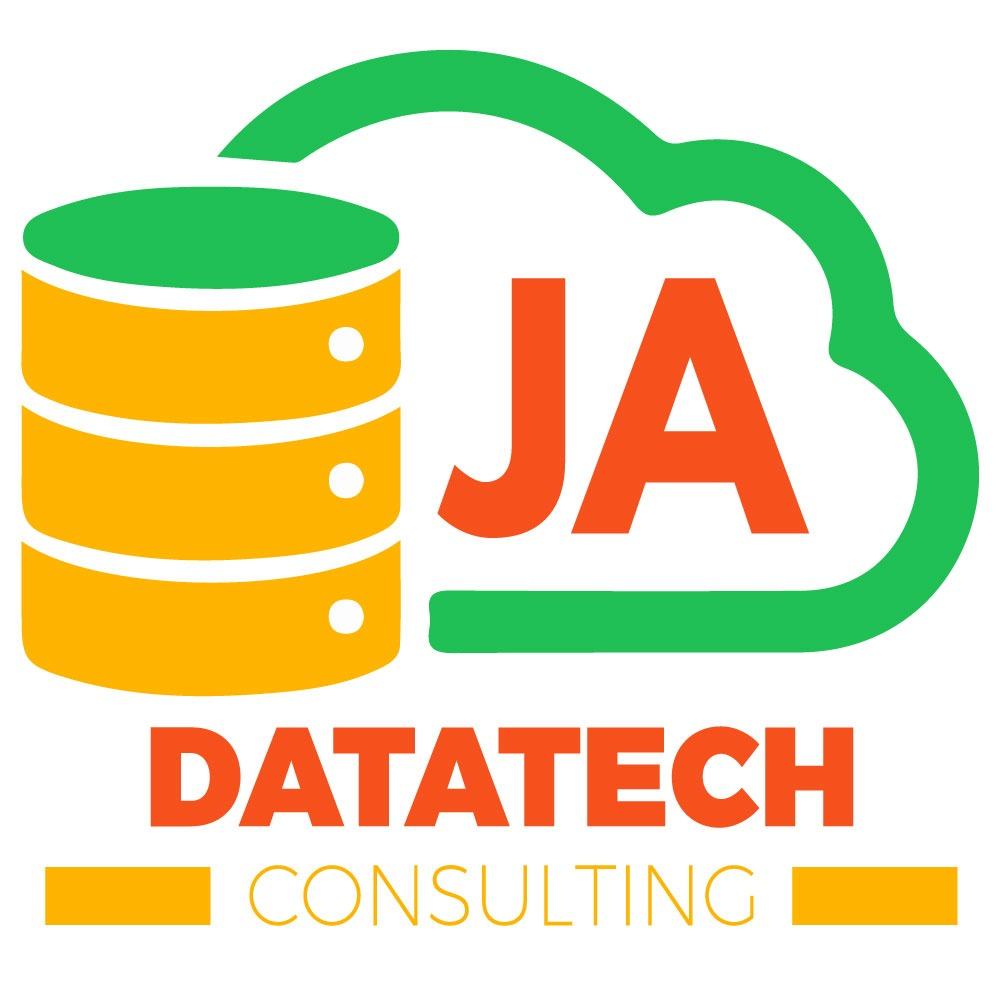